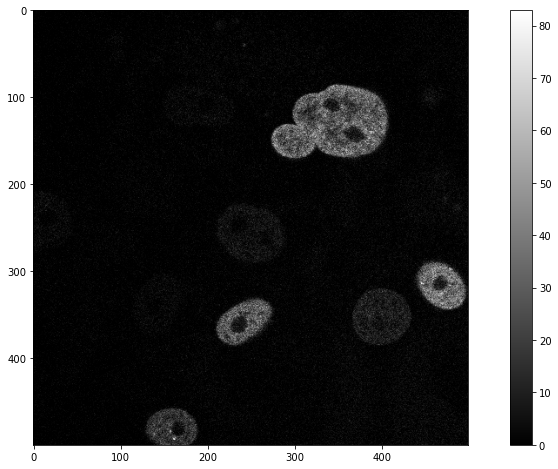

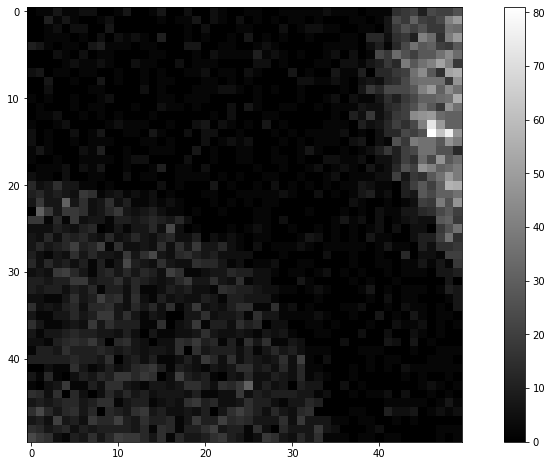

In [1]:
from Functions import image_processing as ip
import skimage.io as sk
import numpy as np
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg

image = sk.imread("Data/N2DH-GOWT1/img/t01.tif")
img_r = ip.img_resize(image, 500, 500)
ip.show_image(img_r, 15, 8)

img_small = image[300:350, 400:450]
ip.show_image(img_small, 15, 8)

regions = np.zeros(img_small.shape, int)  # array with region number
regions[0, 0] = 1  # Startpixel is region number 1

In [2]:
# eventuell noch Methode um nur neue Distanzen zu berechnen
def unseeded_region_growing_algorithm(img, reg, t):
    neighbors = srg.find_neighbors(reg)
    while len(neighbors)>0:
        distance_result = urg.unseeded_distance(img, neighbors, reg)
        dis = distance_result[0]
        nearest_region = distance_result[1]
        pick = urg.unseeded_pixel_pick(dis)
        if dis[pick] < t:
            reg = urg.unseeded_region_direct(reg, pick, nearest_region) # Fehlermeldung nicht verstanden
        else:
            reg = urg.unseeded_region_indirect_or_new(img, reg, pick, t)
        neighbors_add = srg.add_neighbors(img, pick)
        for j in neighbors_add:
            if j not in neighbors and reg[j] == 0:
                neighbors.append(j)
        neighbors.remove(pick)
        dis[pick] = 500
        print(len(neighbors))
    return reg

3
4
4
5
5
6
6
6
6
7
8
9
10
11
12
14
16
17
19
20
20
20
20
20
19
20
20
20
21
22
23
25
25
25
26
27
27
27
27
27
28
29
31
32
33
33
34
34
34
35
36
36
37
37
38
39
40
41
42
43
43
44
45
47
48
49
49
49
48
47
47
47
47
48
49
49
49
48
49
51
52
53
55
56
57
57
57
57
57
57
57
58
59
59
60
61
61
63
63
64
65
66
67
67
67
68
69
70
70
69
68
67
67
68
69
70
71
71
72
73
75
76
77
79
79
79
80
82
82
82
82
81
81
81
82
84
84
85
84
84
84
85
86
87
87
88
87
86
86
87
87
87
89
89
88
87
86
85
85
86
88
90
89
88
88
87
86
86
85
85
86
87
87
87
87
88
89
89
89
89
89
91
91
92
93
94
95
96
96
97
98
99
100
101
102
104
105
105
106
107
107
107
108
109
111
111
112
111
112
113
113
113
114
115
116
116
116
116
117
116
115
114
114
114
114
114
113
113
113
113
112
111
111
111
111
110
109
108
108
110
111
112
113
113
115
114
113
112
111
110
110
111
111
111
111
110
109
108
107
107
107
107
108
109
110
111
111
112
112
112
113
113
113
113
114
116
116
116
117
118
118
118
119
120
120
119
120
120
121
122
123
124
125
127
127
126
127
127
128
129
130


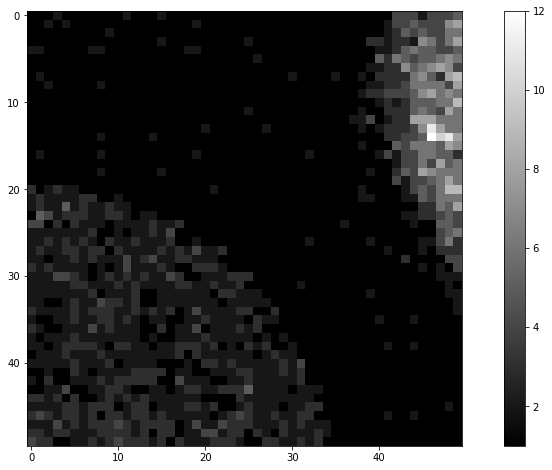

In [3]:
#  Je kleiner Threshold, desto mehr Regionen und desto länger dauert es
test2 = unseeded_region_growing_algorithm(img_small, regions, 5)
print(test2)
ip.show_image(test2, 15, 8)